In [1]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt, rcParams
from zaps.eda import UniStat, Dist, NumAna, Olrs

# set matplotlib style
rcParams['figure.autolayout'] = True
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

#### Test Data

In [2]:
# load dataset
df = datasets.load_breast_cancer(as_frame = True)['frame']

df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [3]:
# column types
cat_cols = ['target']
num_cols = df.columns[:-1]

# outliers
lrs = Olrs(num_cols, hide_p_bar = True)
lrs_df = lrs.fit_transform(df)

# more categories for grouping
np.random.seed(45)

df['multi_cat'] = np.random.choice(['a', 'b', 'c', 'd'], p = [.4, .3, .2, .1], size = len(df))
df['cat_feat'] = np.random.choice(['e', 'f'], p = [.4, .6], size = len(df))
df['multi_cat_none'] = np.random.choice(['g', 'h', None], p = [.1, .4, .5], size = len(df))

### Univariate Analysis plots

In [4]:
u_s = UniStat(df = df, 
              col_drop = df.columns[-4:-3], # `target` column
              card_thresh = 2,
              rare_thresh = .3,  
              figsize = (5,5),
              n_rows = 2,
              n_cols = 1,
              hide_p_bar = True)

[zaps] **INFO** Missing values in categorical columns will be considered as an additional 'missing' level when calculating cardinality and rare levels percent


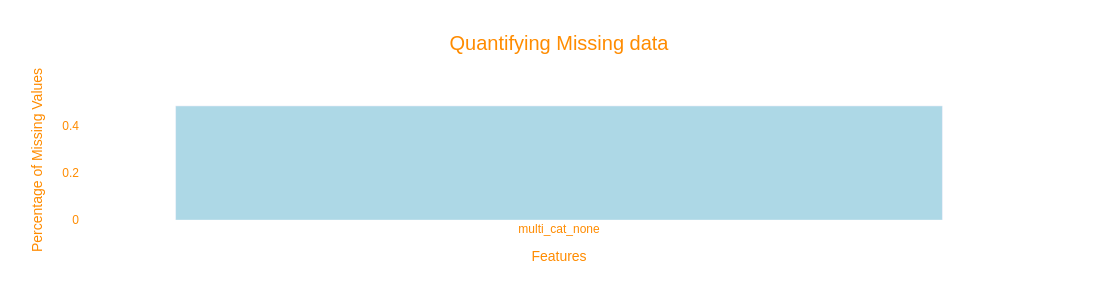

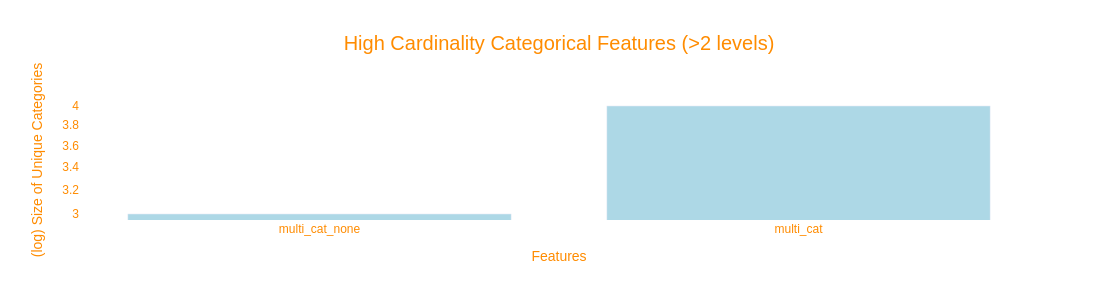

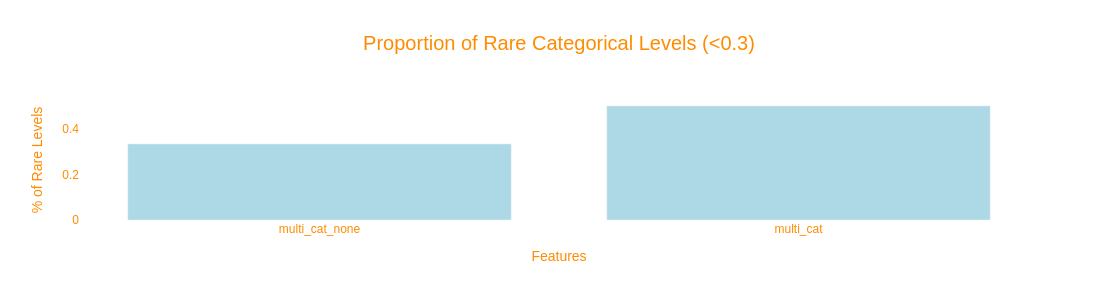

In [5]:
# missing values, high card and rare cats
u_s.stats_plot(width = 800, height = 300)

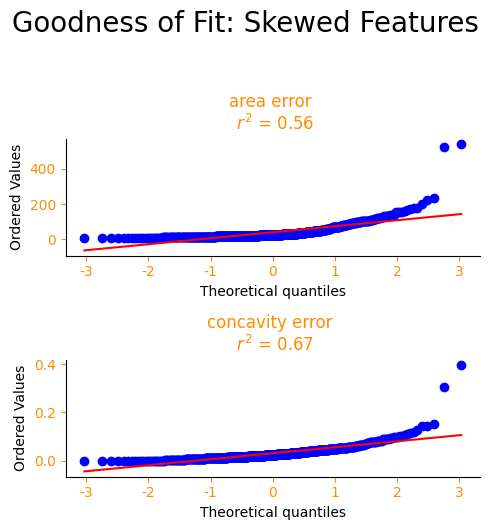

[zaps] **INFO** 20 out of 22 features remaining, to continue plotting press 'Enter' or input any value to exit.


 n


In [6]:
# skewed feats
u_s.skew_plot()

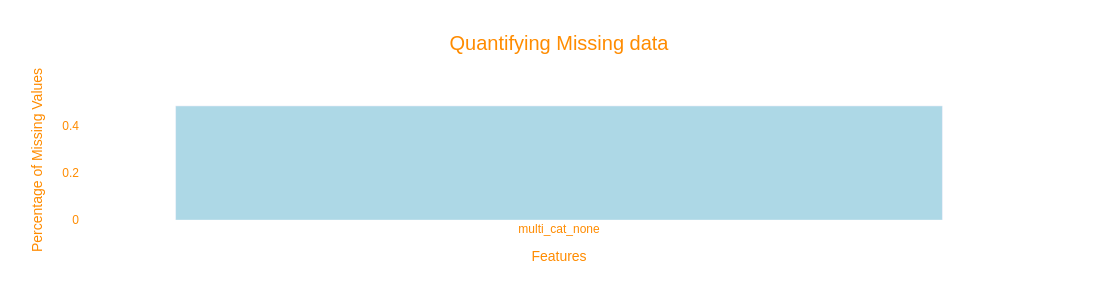

[zaps] **INFO** No High Cardinality Categorical Features (>4)
[zaps] **INFO** No Rare Categorical Levels (<0.1)


In [7]:
# adjusting thresholds
del u_s.z_hc_data_

u_s.card_thresh = 4
u_s.rare_thresh = .1
u_s.stats_plot(width = 800, height = 300)

In [8]:
# attributes
display(
    u_s.z_hc_data_,
    u_s.z_miss_data_,
    u_s.z_rare_cat_,
    u_s.z_summary_
)

Series([], dtype: int64)

multi_cat_none    0.4851
Name: pct_missing, dtype: object

Empty DataFrame
Columns: [unique, n_rare_lvls, pct_rare_lvls]
Index: []

rows  columns  num_feats  cat_feats  high_card_cats  rare_lvl_cats  \
0   569       34         30          4               0              0   

   n_feats_missing_data  n_inf_feats  duplicates  
0                     1            0           0

### Distribution plots

In [9]:
# generic setup
hue_agg = ['count']
log_scale = False
color = 'red'
palette = 'Set1'
nbins = 'auto'
axis = 'both'
tight  = True
x_ax_rotation  = 25
theme = 'brown'
hue = 'target' # None

[zaps] **INFO** Columns are assumed to be Numeric. If not correct, please manually set 'cat_cols' parameter


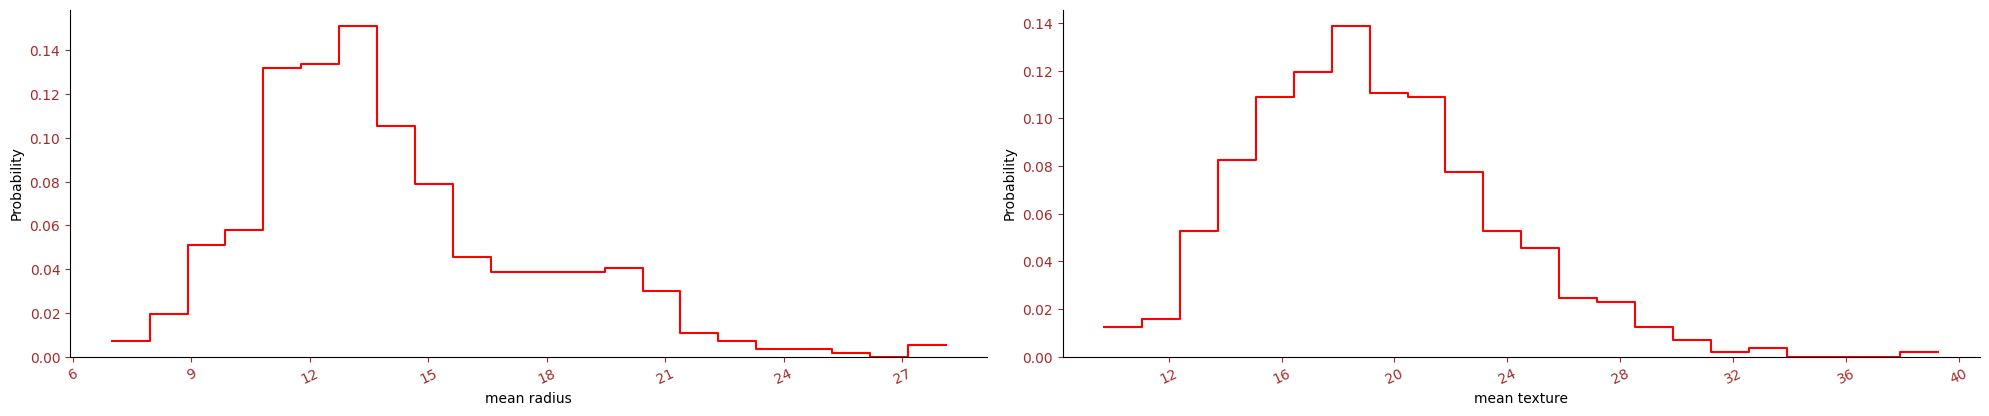

In [10]:
# iterative plotting - histograms
_ = Dist(df = df, cols = num_cols[:2], hide_p_bar = True)

_.hs(bins = 'fd', stat = 'probability', multiple = 'layer', element = 'step', fill = False, discrete = False,
     hue_agg = hue_agg, log_scale = log_scale, color = color, palette = palette, nbins = nbins, axis = axis,
     tight = tight, x_ax_rotation = x_ax_rotation, theme = theme)

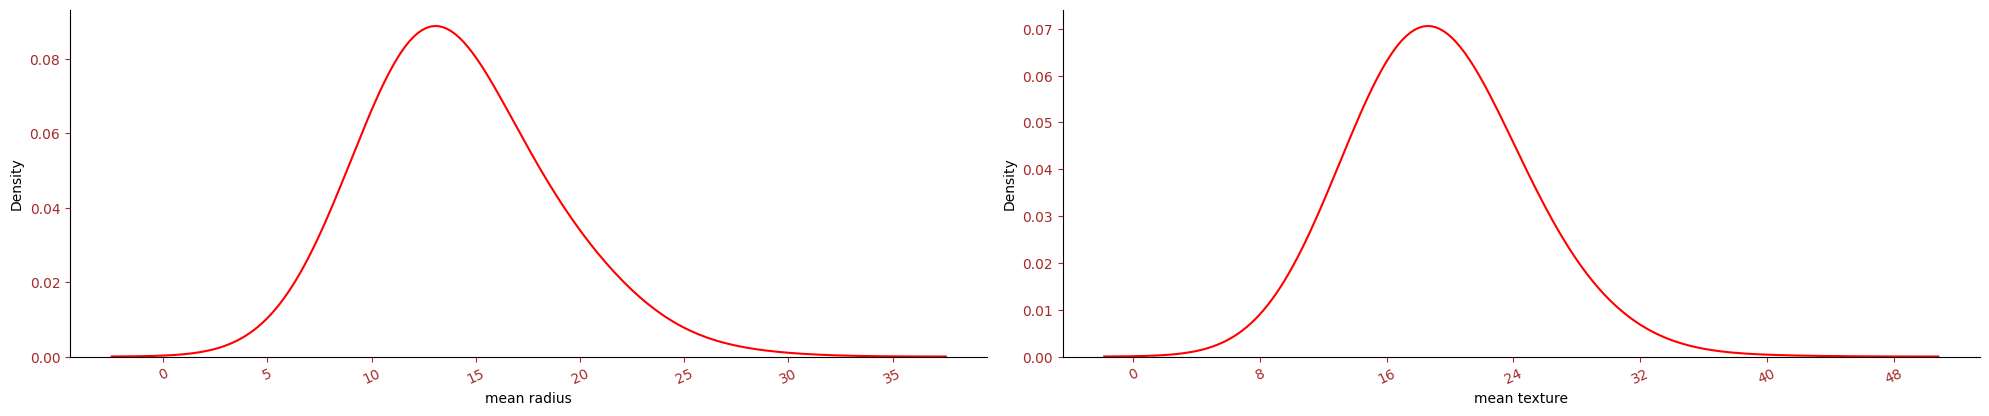

In [11]:
# iterative plotting - kernel density 
_.kd(cut = 3, bw_method = 'silverman', bw_adjust = 3, warn_singular = True, hue_agg = hue_agg, log_scale = log_scale,
     color = color, palette = palette, nbins = nbins, axis = axis, tight = tight, x_ax_rotation = x_ax_rotation,
     theme = theme)

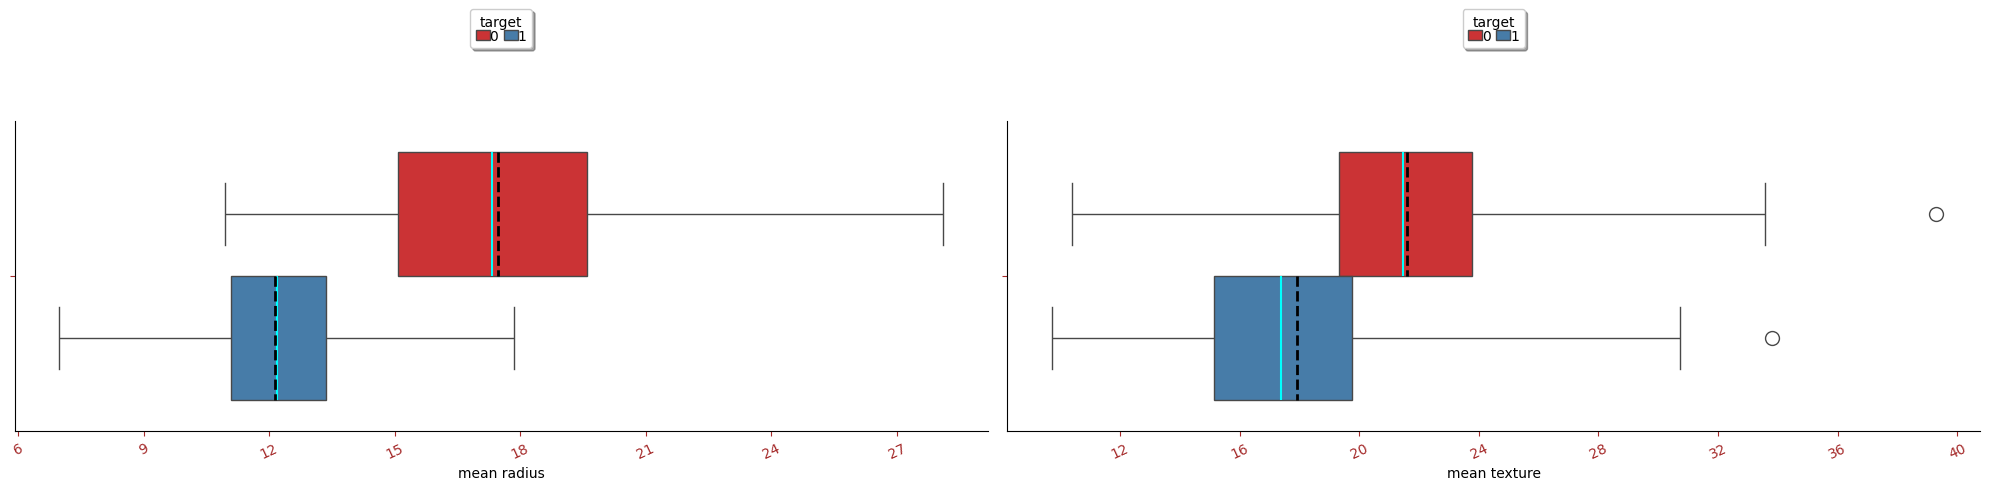

In [12]:
# iterative plotting - box plot 
_.bo(hue = hue, fill = True, showmeans = True,
     meanprops = dict(linewidth = 2, color = 'black'), 
     medianprops = dict(linewidth = 1.5, color = 'cyan'), whis = 3, fliersize = 10, 
     hue_agg = hue_agg, log_scale = log_scale, color = color, palette = palette, nbins = nbins, 
     axis = axis, tight = tight, x_ax_rotation = x_ax_rotation, theme = theme)

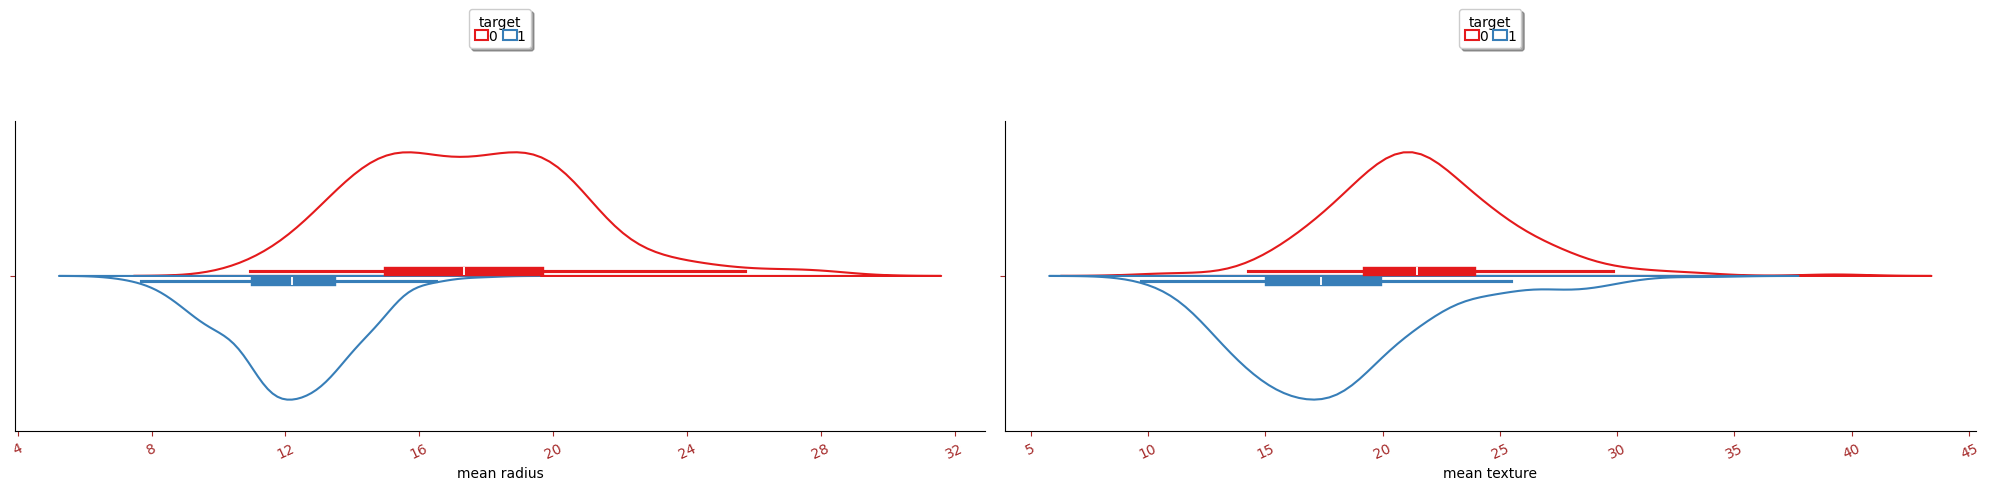

In [13]:
# iterative plotting - violin plot 
_.vi(hue = hue, fill = False, inner = 'box', split = True, cut = 3, bw_method = 'silverman', bw_adjust = 1, 
     density_norm = 'count', hue_agg = hue_agg, log_scale = log_scale, color = color, palette = palette, nbins = nbins, 
     axis = axis, tight = tight, x_ax_rotation = x_ax_rotation, theme = theme)

[zaps] **INFO** Columns are assumed to be Categorical. If not correct, please manually set 'cat_cols' parameter


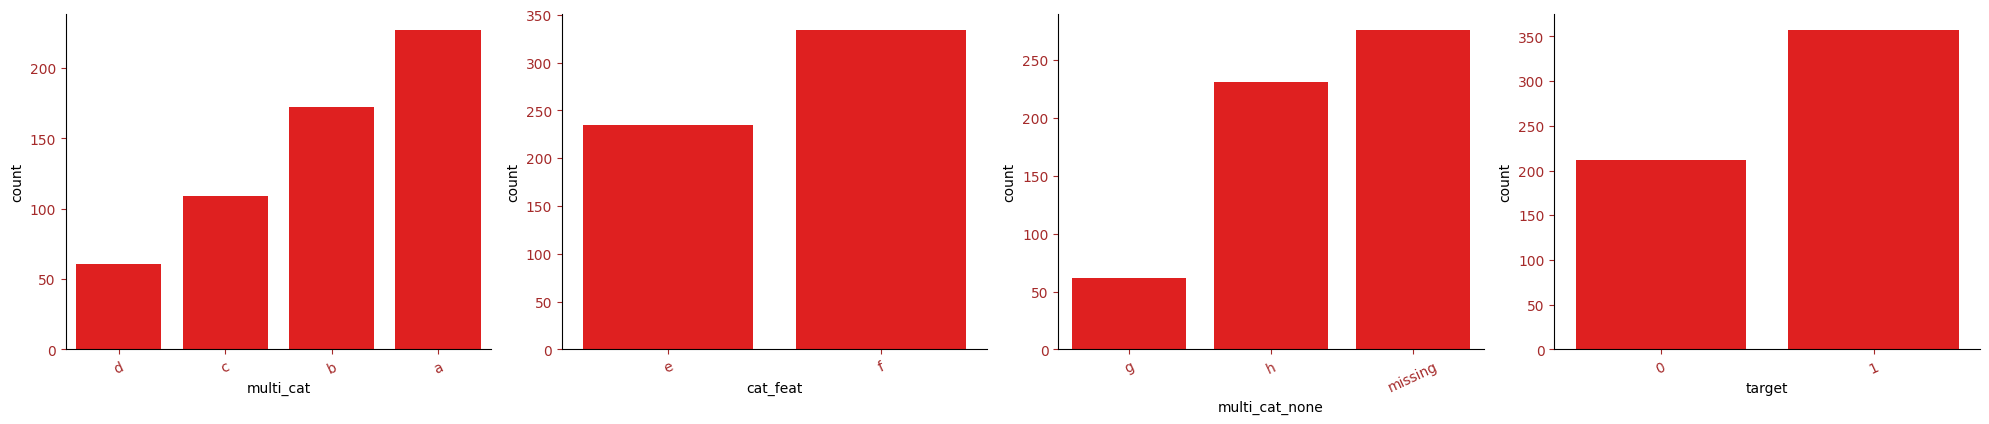

In [14]:
# iterative plotting - count plot
_ = Dist(df = df, cols = ['multi_cat', 'cat_feat', 'multi_cat_none', 'target'], hide_p_bar = True)

_.cp(stat = 'count', native_scale = False, legend = 'auto', hue_agg = hue_agg, log_scale = log_scale, color = color, 
     palette = palette, nbins = nbins, axis = axis, tight = tight, x_ax_rotation = x_ax_rotation, theme = theme)

[zaps] **INFO** Columns are assumed to be Categorical. If not correct, please manually set 'cat_cols' parameter


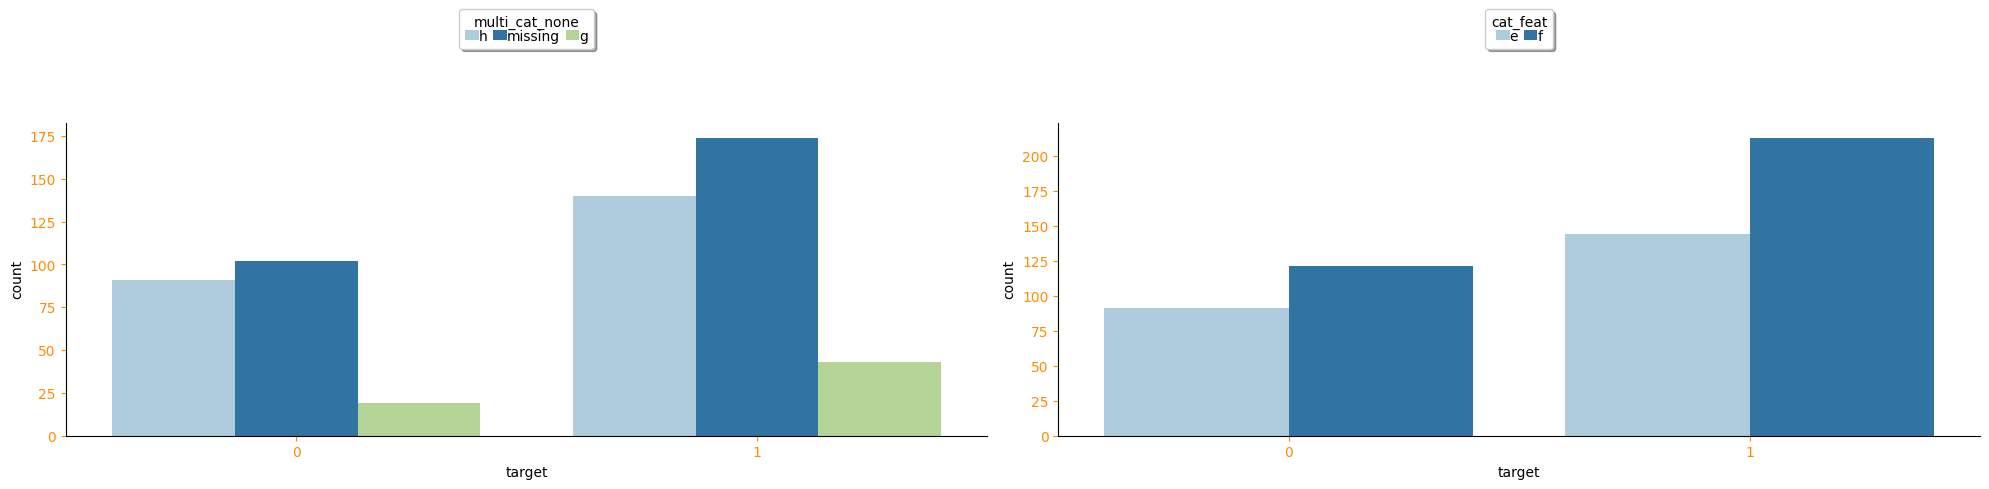

In [15]:
# iterative plotting - cat feats vs discat target
_ = Dist(df = df, cols =  ['multi_cat_none', 'cat_feat'], target = 'target', hide_p_bar = True)

_.cp()

[zaps] **INFO** Columns are assumed to be Categorical. If not correct, please manually set 'cat_cols' parameter


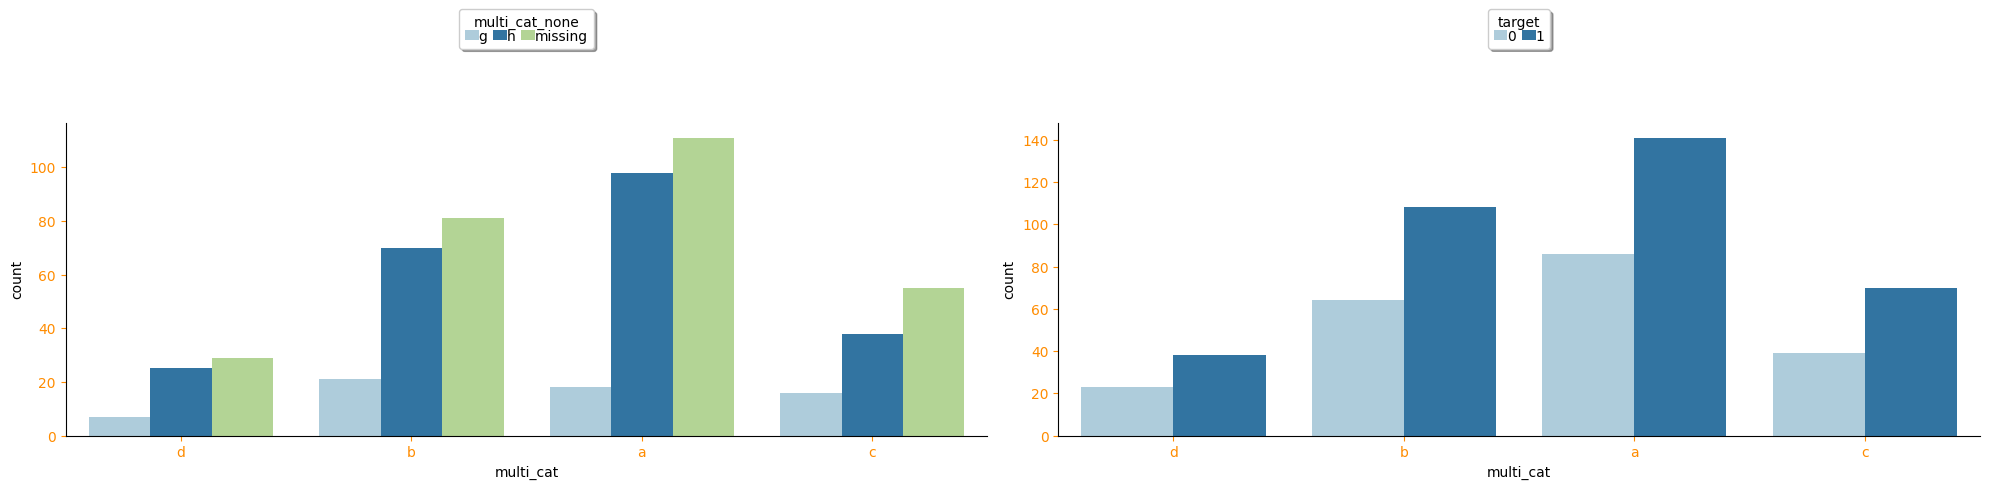

In [16]:
# iterative plotting - cat feats vs cat target
_ = Dist(df = df, cols =  ['multi_cat_none', 'target'], target = 'multi_cat', hide_p_bar = True)

_.cp()

[zaps] **INFO** Columns are assumed to be Numeric. If not correct, please manually set 'cat_cols' parameter


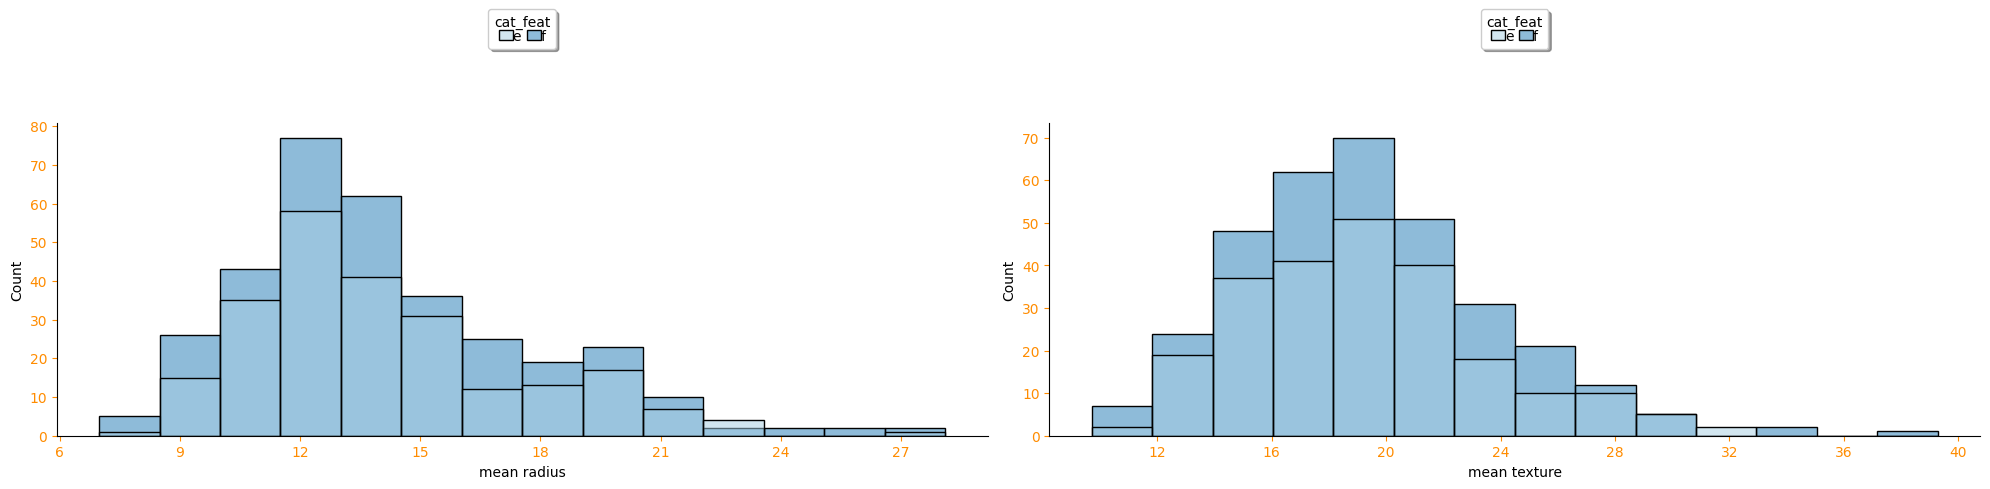

In [17]:
# iterative plotting - num feats vs cat target
_ = Dist(df = df, cols = num_cols[:2], target = 'cat_feat', hide_p_bar = True)

_.hs()

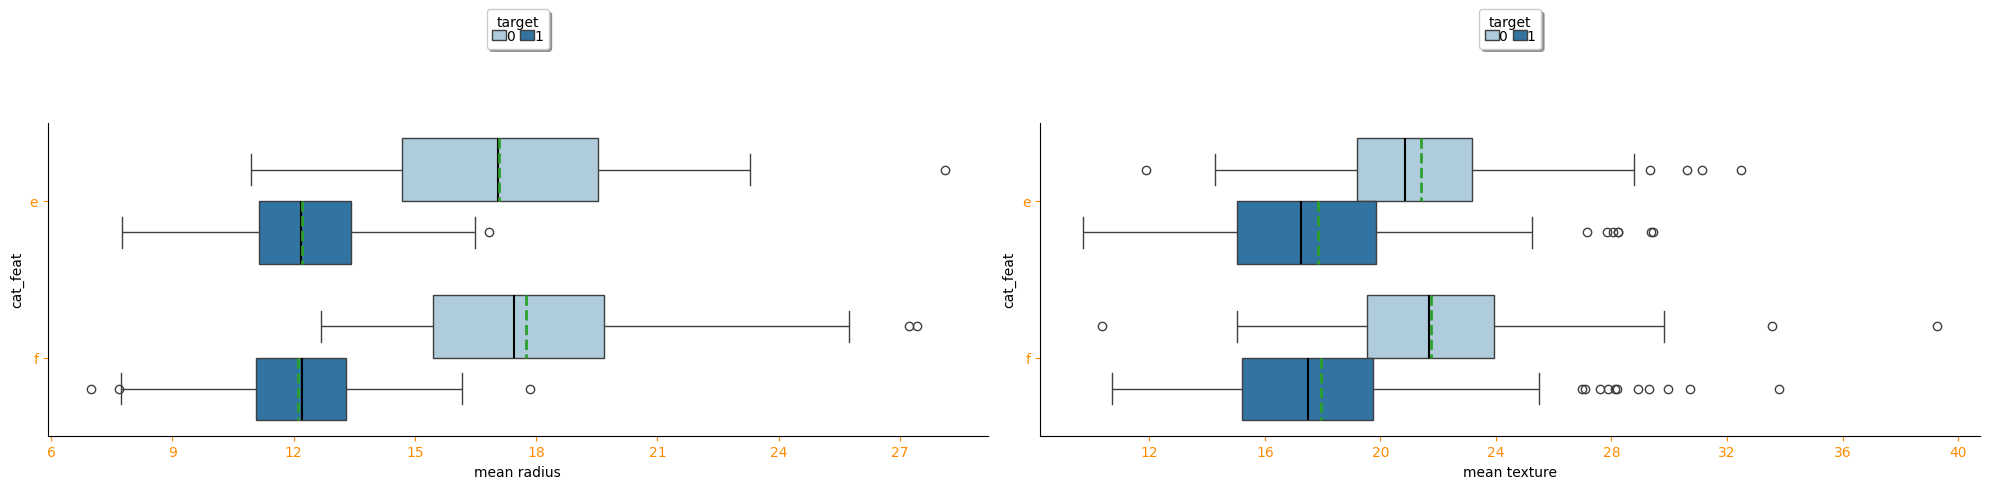

In [18]:
# with hue
_.bo(hue = hue)

[zaps] **INFO** Columns are assumed to be Numeric. If not correct, please manually set 'cat_cols' parameter


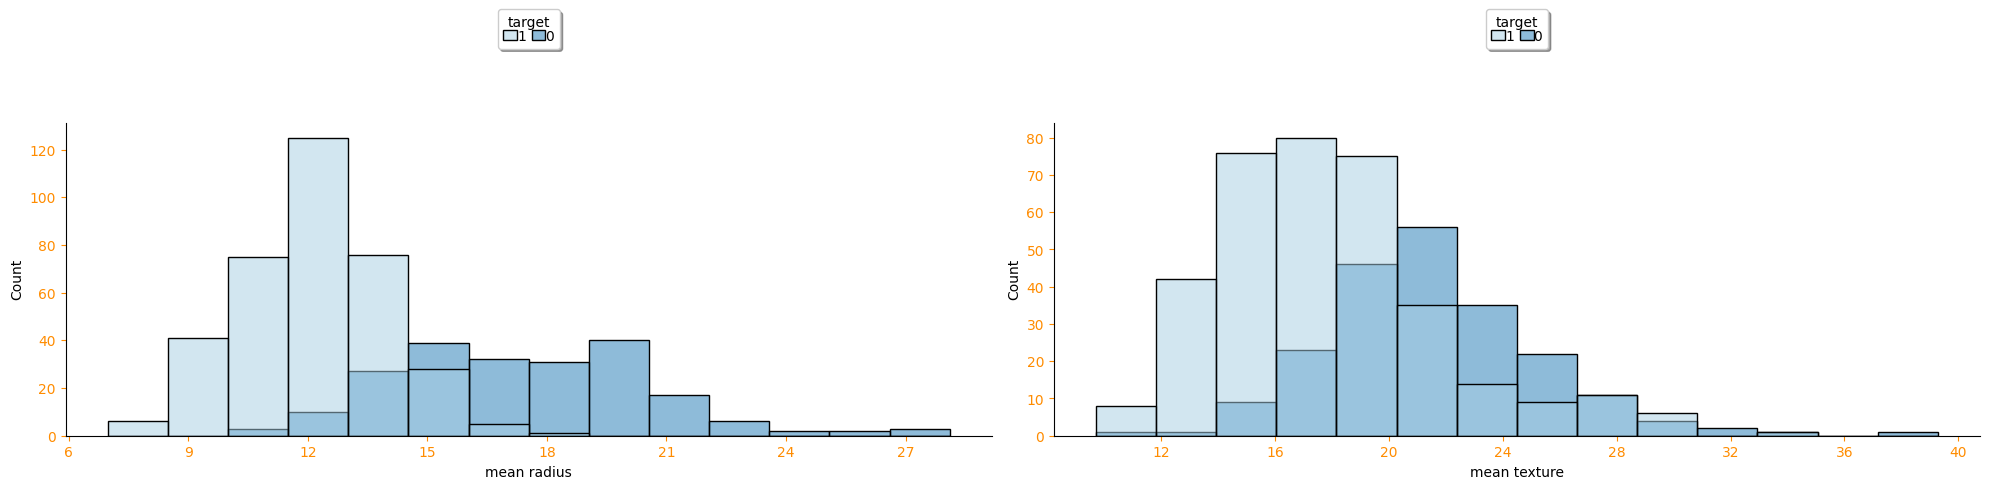

In [19]:
# iterative plotting - num feats vs discat target
_ = Dist(df = df, cols = num_cols[:2], target = 'target', hide_p_bar = True)

_.hs()

In [20]:
# finding best fitting distribution
_.best_fit(
           method = 'parametric', 
           distr = ['norm', 'expon', 'uniform', 'lognorm'], 
           stats = 'RSS',
           n_boots = 50)

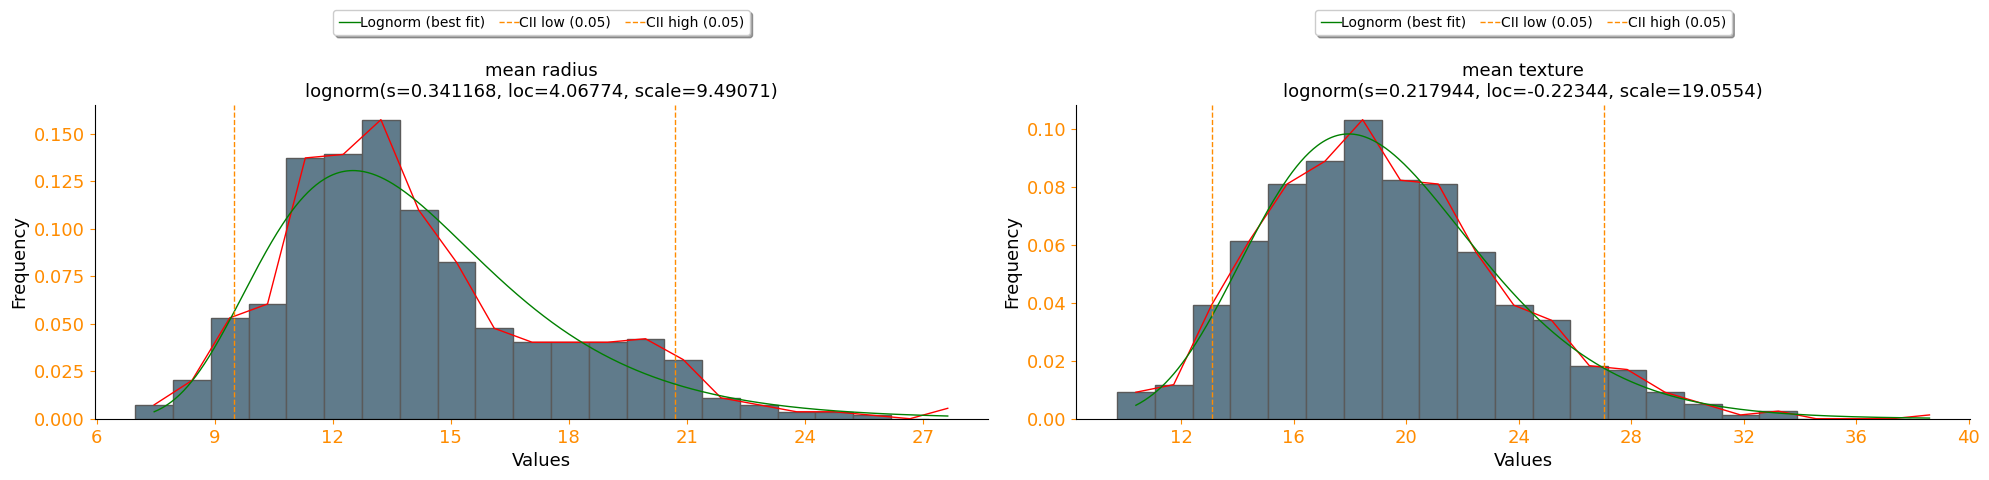

In [21]:
# visualize fit results
_.best_vis()

In [22]:
# fitted model
_.z_best_fit_results_['mean radius'].model

{'name': 'lognorm',
 'score': 0.004227399436319319,
 'loc': 4.067739459086459,
 'scale': 9.490707181098848,
 'arg': (0.34116775181506287,),
 'params': (0.34116775181506287, 4.067739459086459, 9.490707181098848),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fa518dd5b50>,
 'bootstrap_score': 0.0,
 'bootstrap_pass': False,
 'color': '#e41a1c',
 'CII_min_alpha': 9.482572863634019,
 'CII_max_alpha': 20.70232746353262}

### Numeric Analysis plots

[zaps] **INFO** logistic fit will be applied


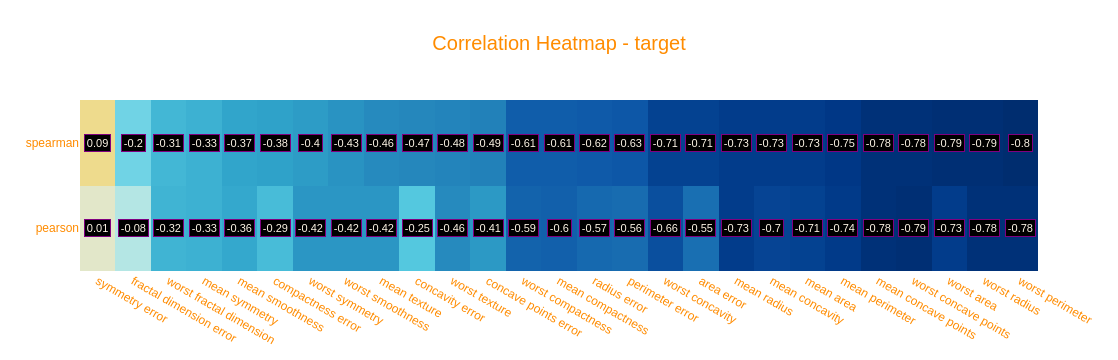

[zaps] **INFO** 7 out of 22 features remaining, to continue plotting press 'Enter' or input any value to exit.


 n


area error   mean radius
pearson    -5.482359e-01 -7.300285e-01
p_val_pear  5.895521e-46  8.465941e-96
spearman   -7.141837e-01 -7.327850e-01
p_val_spr   6.704014e-90  7.219246e-97

compactness error  worst symmetry  worst smoothness  \
area error            0.409830        0.154415          0.188777   
mean radius           0.264904        0.174698          0.125789   

             mean texture  concavity error  worst texture  \
area error       0.395139         0.461359       0.327857   
mean radius      0.340956         0.364555       0.314911   

             concave points error  worst compactness  mean compactness  \
area error               0.588749           0.413658          0.539511   
mean radius              0.410576           0.491357          0.497578   

             radius error  ...  area error  mean radius  mean concavity  \
area error       0.952867  ...    1.000000     0.738077        0.644344   
mean radius      0.550247  ...    0.738077     1.000000        0.645728   

             mean area  mean perimeter  mean concave points  \
area error    0.741518        0.745824             0.726982   
mean radius   0.999602        0.997802             0.759702   

             worst concave points  worst area  worst radius  worst perimeter  
area error               0.619539    0.775662      0.774244         0.768336  
mean radius              0.727265    0.978863      0.978604         0.971555  

[2 rows x 22 columns]

In [23]:
# correlation plots
n_a = NumAna(df, num_cols, 'target', hide_p_bar = True)
corr_mtrx, feat_corr_mtrx = n_a.corr(disp_corr = 'spearman', quant = .25, thresh = .8, alpha = .05, plot = True)

display(corr_mtrx[['area error', 'mean radius']], feat_corr_mtrx[['area error', 'mean radius']].T)

In [24]:
# logistic fit plots
n_a = NumAna(df = df,
             cols = num_cols[:5],
             target = 'target',
#              fit = 'logit',
             method = 'cg',
             figsize = (15,3),
             n_rows = 1,
             n_cols = 4,
             silent = True,
             hide_p_bar = True,
             theme = 'darkorange',
             warn_convergence = True,
             gtol = 1e-6,# kwarg for 'cg' method
             ).fit_models()

[zaps] **INFO** logistic fit will be applied


0
Intercept         15.245351
Q("mean radius")  -1.033552

0.5608287531382327

1.1922673385333487e-93

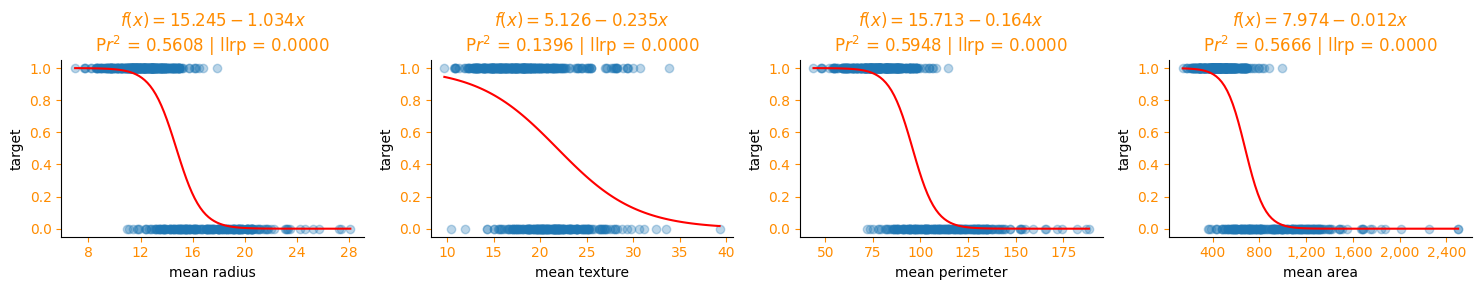

[zaps] **INFO** 1 out of 5 features remaining.


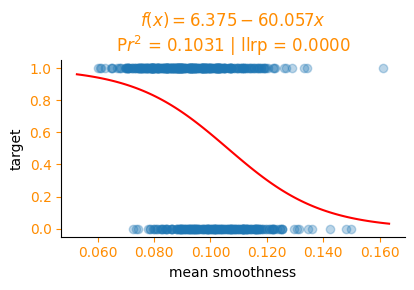

In [25]:
# attributes
display(n_a.z_fit_results_['mean radius'].params, 
        n_a.z_fit_results_['mean radius'].prsquared, 
        n_a.z_fit_results_['mean radius'].llr_pvalue,
       );

# plot
n_a.vis_fit(x_jitter = .01, tc_color = 'r')

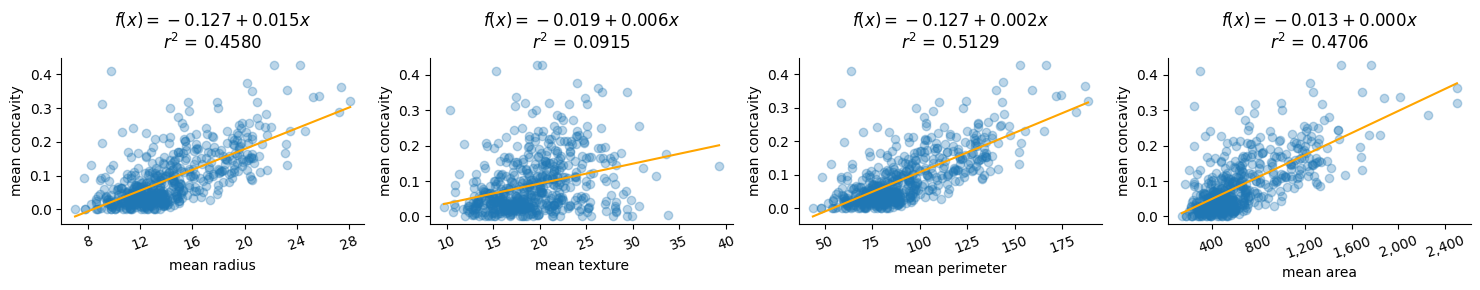

In [26]:
# OLS fit plots
n_a = NumAna(df = df,
             cols = num_cols[:4],
             target = 'mean concavity',
             fit = 'ols',
             figsize = (15,3),
             n_rows = 1,
             n_cols = 4,
             hide_p_bar = True,
             theme = 'black',
             )

n_a.vis_fit(x_ax_rotation = 20)

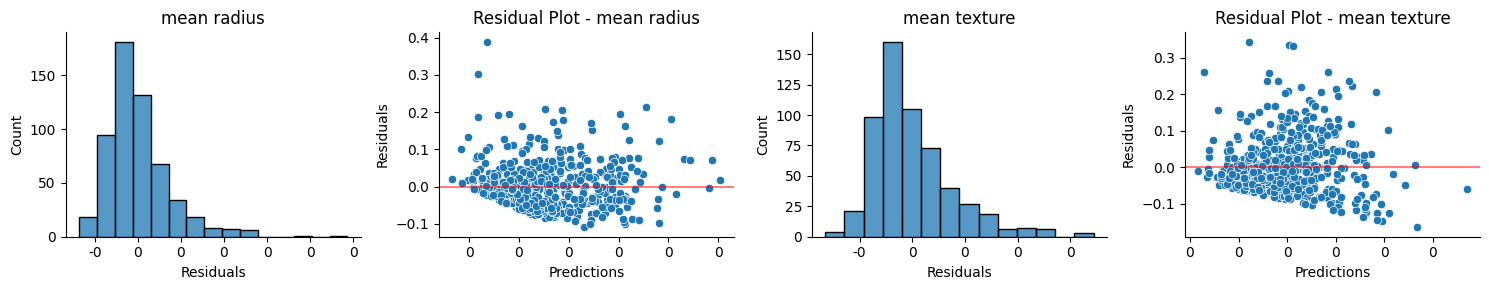

[zaps] **INFO** 2 out of 4 features remaining, to continue plotting press 'Enter' or input any value to exit.


 n


In [27]:
# OLS assumptions plots
n_a.vis_ols_fit()

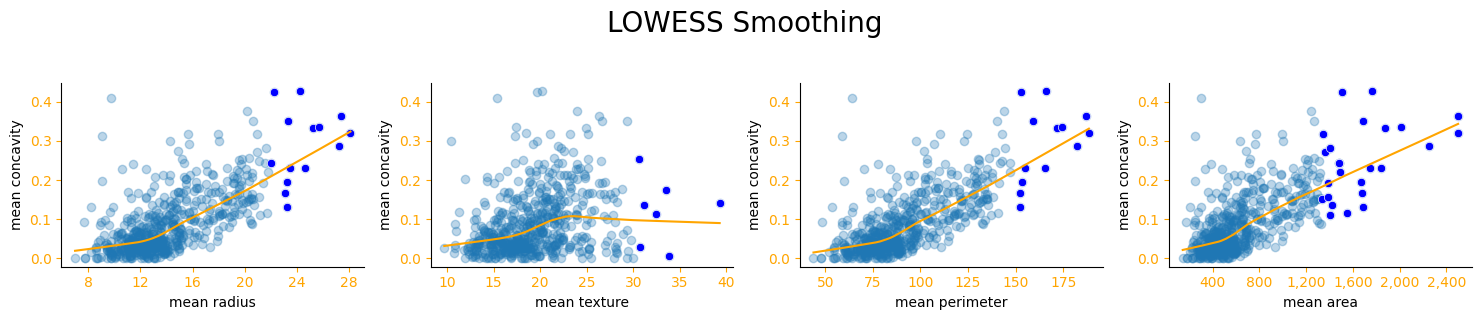

In [28]:
# lowess fit plots
n_a = NumAna(df = df,
             cols = num_cols[:4],
             target = 'mean concavity',
             fit = 'lws',
             figsize = (15,3),
             n_rows = 1,
             n_cols = 4,
             hide_p_bar = True,
             theme = 'orange',
             ).vis_fit(olrs_mapping = lrs.z_olrs_, olrs_color = 'b')

[zaps] **INFO** Polynomial Least Squares fit will be applied


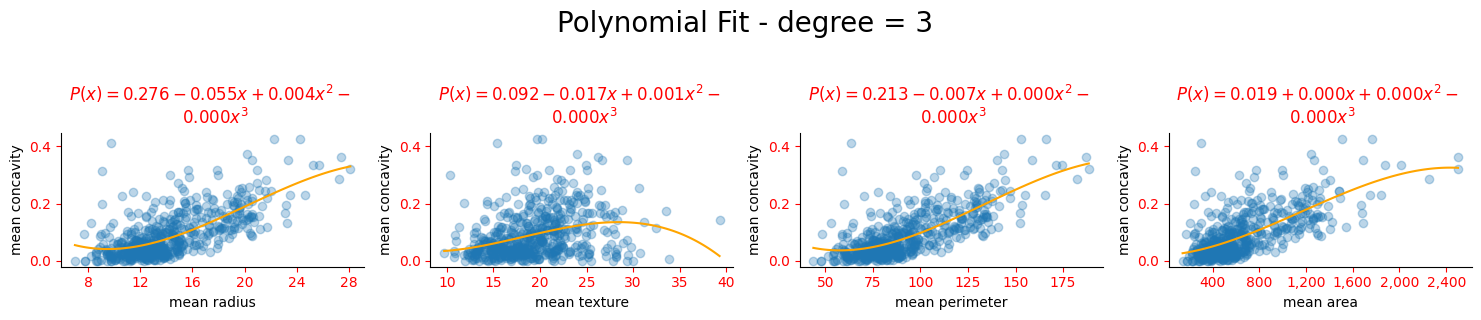

In [29]:
# polynomial fit plots
n_a = NumAna(df = df,
             cols = num_cols[:4],
             target = 'mean concavity',
             degree = 3,
             fit = 'lws', # should be ignored
             figsize = (15,3),
             n_rows = 1,
             n_cols = 4,
             hide_p_bar = True,
             theme = 'red',
             ).vis_fit()

[zaps] **INFO** logistic fit will be applied


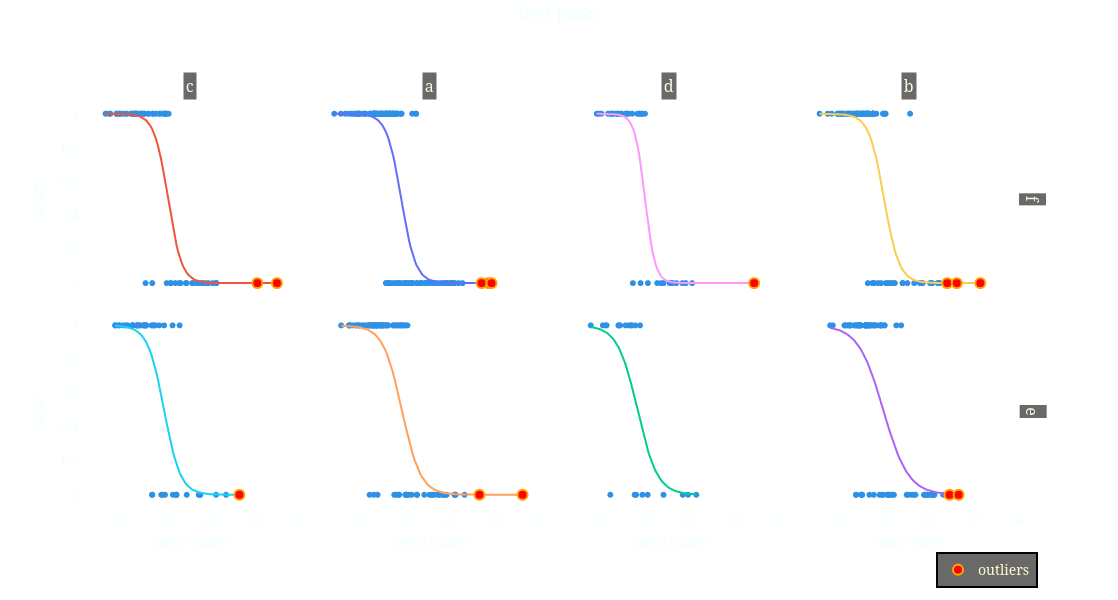

In [30]:
# multivariate plot - logistic fit

# whats tested?
# `category_orders` passing specific order overriding default one
# `hoverdata` numeric format, removal of facets and inclusion of index
# `z_plotly_fit_` attribute
# Ignoring `facet_col_wrap`
# overlaying outliers and fit assignment per facet
# title, theme, traces

n_a = NumAna(df, num_cols, 'target', hide_p_bar = True)

n_a.vis_multi(
    col = "mean radius",
    olrs_idx = lrs.z_olrs_["mean radius"],
    facet_col = 'multi_cat',
    facet_row = 'cat_feat',
    category_orders = {
                        'multi_cat': ['c', 'a', 'd', 'b'],
                        'cat_feat': ['f', 'e'],
                       },
    facet_col_wrap = 3, # ignored in favor of "facet_row"
    title =  'test pass',
    height = 600,
    theme = 'azure'
    
)

In [31]:
# confirm fit results of 2nd column and row [a,e]
n_a.z_plotly_fit_.iloc[6]['fit'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            Q("target")   No. Observations:                   89
Model:                        MNLogit   Df Residuals:                       87
Method:                           MLE   Df Model:                            1
Date:                Sat, 16 Nov 2024   Pseudo R-squ.:                  0.5394
Time:                        18:50:50   Log-Likelihood:                -26.773
converged:                       True   LL-Null:                       -58.131
Covariance Type:            nonrobust   LLR p-value:                 2.387e-15
====================================================================================
   Q("target")=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.8159      3.002      4.603      0.000       7.933      19.699
Q("mean radius")    -0.9484      0.214     -4.432      0.000      -1.368      -0.529
====================================================================================
"""

In [32]:
# confirm outlier points mapping
subset = df[(df.multi_cat == 'a') & (df.cat_feat == 'e')] # [a,e]
idx = lrs.z_olrs_["mean radius"][lrs.z_olrs_["mean radius"].isin(subset.index)]

subset.loc[idx][['mean radius', 'target']]

mean radius  target
164        23.27       0
212        28.11       0

In [33]:
# test multivariate plot - Poly fit

# what's tested?
# `facet_col_wrap`
# fit assignment per facet
# log checks
# trace text
# `z_plotly_fit_` attribute

n_a = NumAna(df, num_cols, 'mean radius', degree = 3, hide_p_bar = True)

n_a.vis_multi(
    col = "mean concavity",
    olrs_idx = lrs.z_olrs_["mean concavity"],
    facet_col = 'multi_cat',
    category_orders = {
                        'multi_cat': ['b', 'a', 'c', 'd'],
                       },
    facet_col_wrap = 2,
    trendline_options = {'log_x' : True},
)

[zaps] **INFO** Polynomial Least Squares fit will be applied
[zaps] **INFO** Log_x transformation was not applied, mean concavity includes non-positive values


In [34]:
# confirm fit results [a]
n_a.z_plotly_fit_.iloc[[2]]

multi_cat        x^0        x^1         x^2       x^3
2         a  10.442632  55.969173 -115.939054  61.32307

In [35]:
# ignoring `facet_col_wrap`
n_a.vis_multi(
    col = "mean concavity",
    olrs_idx = lrs.z_olrs_["mean concavity"],
    facet_col = 'multi_cat',
    facet_col_wrap = 2, # ignored in favor of 'trendline_scope'
    trendline_scope = "overall",
)

In [36]:
# confirm fit results - overall
n_a.z_plotly_fit_

x^0      x^1        x^2        x^3
0  10.967241  42.1248 -36.645263 -19.106876

In [37]:
# more grouping [color, symbol]
n_a.vis_multi(
    col = "mean concavity",
    olrs_idx = lrs.z_olrs_["mean concavity"],
    color = 'mean texture',
    symbol = 'cat_feat',
    facet_col = 'multi_cat',
    facet_row = 'target',
    facet_col_wrap = 0,
    width = 1100,
    height = 500
)

In [38]:
# confirm fit results [e,c,0]
n_a.z_plotly_fit_.iloc[11]

cat_feat               e
target                 0
multi_cat              c
x^0             7.804565
x^1           263.176066
x^2          -2409.51541
x^3          6909.379812
Name: 11, dtype: object

In [39]:
# test 3D multivariate plot - logistic fit

# what's tested?
# overlaying outliers
# z-axis assigned to 'target'
# hovertext
# layout

n_a = NumAna(df, num_cols, 'target', hide_p_bar = True)

n_a.vis_multi_d(
    x = "mean concavity",
    y = 'mean texture',
    olrs_idx = lrs.z_olrs_["mean concavity"],
    color = 'mean radius',
)

[zaps] **INFO** logistic fit will be applied


### Input validation not covered in pytest

In [40]:
# Dist(df, num_cols).cp() # feature categorization in count plot

In [41]:
# Dist(df, cat_cols, target = 'area error').cp() # target categorization in count plot

In [42]:
# Dist(df, ['multi_cat', 'cat_feat']).kd() # missing `target` in kde plot

In [43]:
# Dist(df, num_cols).best_vis() # Dist instance not fitted

In [44]:
# _ = Dist(df, cat_cols)

# _.best_fit(method = 'discrete', distr = ['expon'])

# _.best_vis() # visualizing `discrete` results

In [45]:
# NumAna(df, num_cols, target = 'mean concavity').vis_fit(olrs_idx = lrs.z_olrs_) # passing olrs mapping to index param

In [46]:
# # passing olrs idx to mapping param
# NumAna(df, num_cols, target = 'mean concavity').vis_fit(olrs_mapping = lrs.z_olrs_['mean concavity'])

In [47]:
# NumAna(df, num_cols, target = 'target').vis_ols_fit() # calling ols vis on logistic fit